Ponovljena lokalna pretraga za problem 8 kraljica

In [1]:
#pip install chess

In [2]:
import random
import numpy as np
import chess
import chess.svg
from IPython.display import SVG, display

In [3]:
board = np.zeros((8,8), dtype=int)

In [4]:
def initial_state():
    return random.sample(range(8), 8)

In [5]:
def initial_board(board, state):
    for i in range(8):
        board[state[i]][i] = 1;
    return board

In [6]:
def calculate_attacking_pairs(state, board):
    attacking = 0
    
    for i in range(8):
        
        row = state[i]
        col = i - 1
        while (col >= 0 and board[row][col] != 1) :
            col -= 1
         
        if (col >= 0 and board[row][col] == 1) :
            attacking += 1

        
        row = state[i]
        col = i + 1
        while (col < 8 and board[row][col] != 1):
            col += 1
         
        if (col < 8 and board[row][col] == 1) :
            attacking += 1

        
        row = state[i] - 1
        col = i - 1
        while (col >= 0 and row >= 0 and board[row][col] != 1) :
            col-= 1
            row-= 1
         
        if (col >= 0 and row >= 0  and board[row][col] == 1) :
            attacking+= 1;

        
        row = state[i] + 1
        col = i + 1
        while (col < 8 and row < 8  and board[row][col] != 1) :
            col+= 1;
            row+= 1;
         
        if (col < 8 and row < 8 and board[row][col] == 1) :
            attacking += 1

        
        row = state[i] + 1
        col = i - 1
        while (col >= 0 and row < 8  and board[row][col] != 1) :
            col -= 1
            row += 1
         
        if (col >= 0 and row < 8 and board[row][col] == 1) :
            attacking += 1

        
        row = state[i] - 1
        col = i + 1
        while (col < 8 and row >= 0  and board[row][col] != 1) :
            col += 1
            row -= 1
         
        if (col < 8 and row >= 0 and board[row][col] == 1) :
            attacking += 1

    return int(attacking / 2)

In [7]:
def next_state(current_state): 
    return random.sample(range(8), 8)

In [8]:
# Function to generate SVG images from chess boards
def generate_svg_board(state):
    board = chess.Board()
    board.clear_board() 
    for column, row in enumerate(state):
        square = chess.square(column, row)
        board.set_piece_at(square, chess.Piece(chess.QUEEN, chess.WHITE))
    svg_board = chess.svg.board(board=board, size=400)
    return svg_board

In [9]:
def draw_solution(solution):
    for i, state in enumerate(solution):
        svg_board = generate_svg_board(state)
        display(SVG(svg_board))

Ponovljena lokalna pretraga 

In [10]:
def ILS_8_queens(board, num_restarts=10, num_of_iterations=10):
    best_solution = None
    best_value = float('inf')
    history = []
    
    for _ in range(num_restarts):
        current_state = initial_state()
        search_history = [current_state]
        history.append(current_state)

        for _ in range(num_of_iterations):
            # provjeriti sve pozicije da li napada
            # atacking
            attacking_pairs = calculate_attacking_pairs(current_state, board)

            if attacking_pairs == 0:
                break
           
            new_state =  next_state(current_state)
            if attacking_pairs < calculate_attacking_pairs(new_state, board):
                current_state = new_state
                search_history.append(new_state)
                history.append(new_state)
           
        
        if attacking_pairs < best_value:
            best_solution = search_history
            best_value = attacking_pairs

    return best_solution, history

In [11]:
solution, history = ILS_8_queens(board, 20)

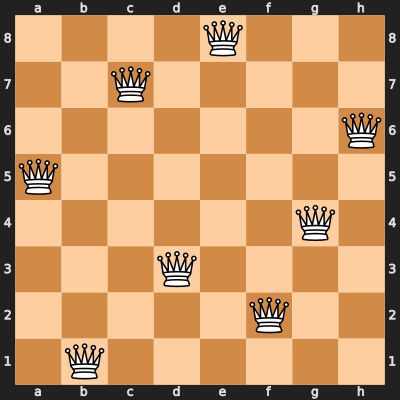

In [12]:
draw_solution(solution)

In [13]:
solution

[[4, 0, 6, 2, 7, 1, 3, 5]]

Historija pretrage

In [14]:
history

[[4, 0, 6, 2, 7, 1, 3, 5],
 [1, 2, 5, 4, 7, 6, 3, 0],
 [7, 2, 5, 1, 3, 4, 0, 6],
 [4, 5, 6, 2, 3, 7, 0, 1],
 [5, 1, 7, 6, 3, 0, 2, 4],
 [6, 4, 5, 3, 7, 2, 0, 1],
 [4, 2, 5, 7, 3, 0, 1, 6],
 [4, 6, 0, 2, 7, 3, 5, 1],
 [2, 0, 3, 4, 5, 6, 1, 7],
 [2, 1, 3, 7, 6, 0, 4, 5],
 [6, 3, 1, 4, 2, 7, 5, 0],
 [0, 1, 4, 2, 5, 3, 7, 6],
 [2, 7, 6, 0, 4, 3, 1, 5],
 [5, 6, 7, 0, 2, 4, 3, 1],
 [4, 2, 0, 7, 5, 6, 3, 1],
 [4, 0, 3, 1, 6, 5, 2, 7],
 [6, 4, 1, 3, 7, 5, 0, 2],
 [4, 7, 0, 5, 6, 1, 3, 2],
 [2, 0, 3, 4, 1, 6, 5, 7],
 [7, 4, 2, 5, 6, 1, 3, 0]]

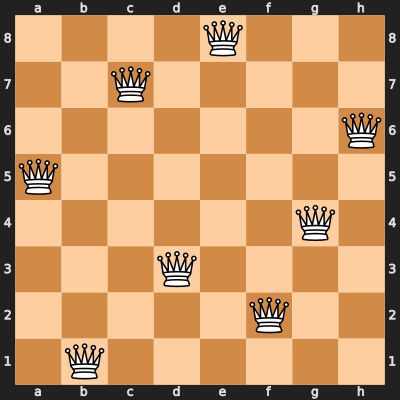

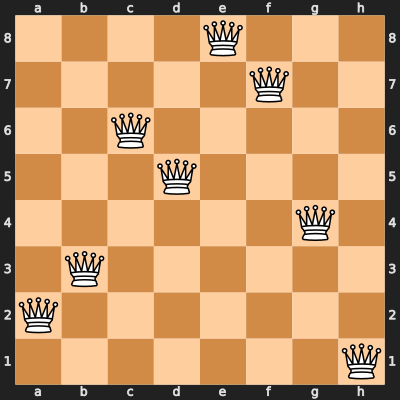

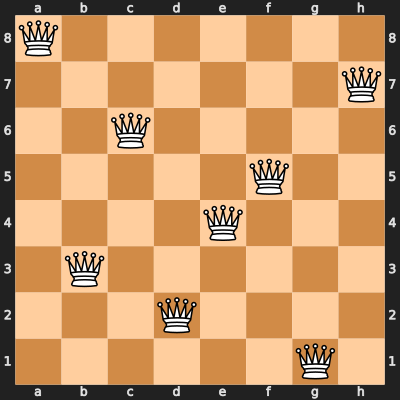

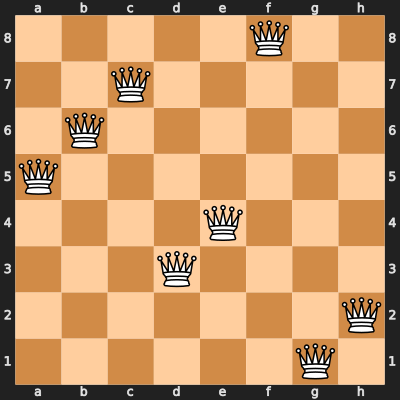

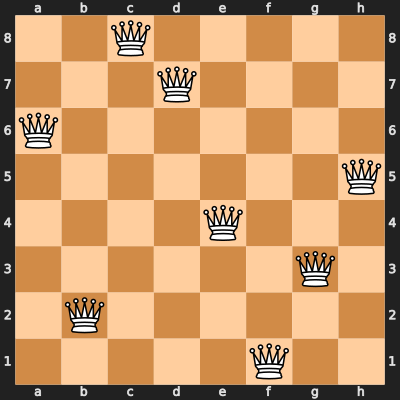

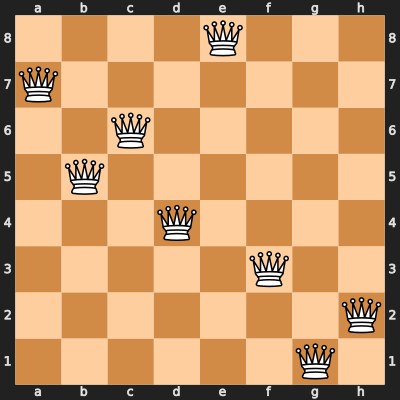

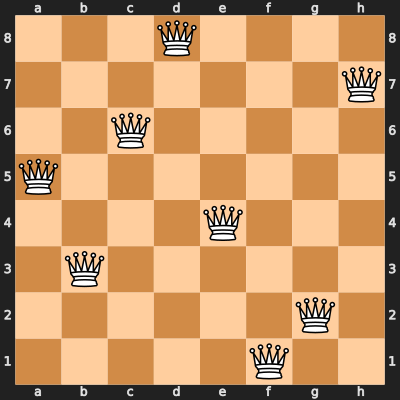

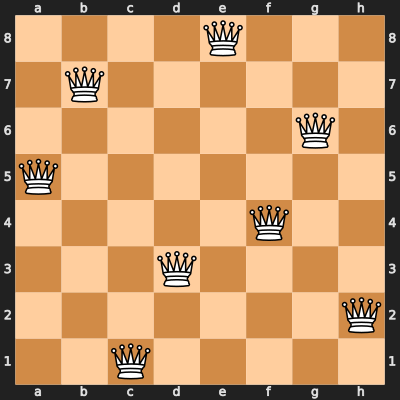

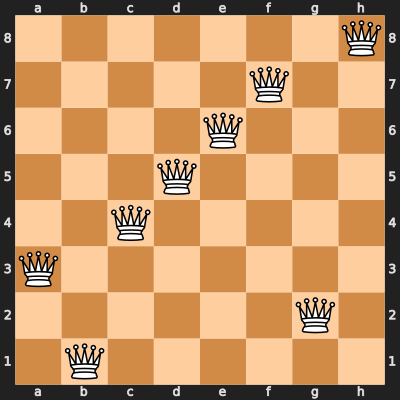

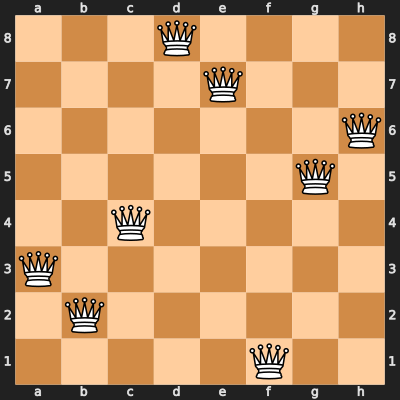

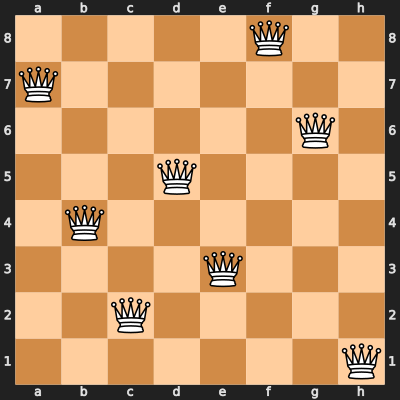

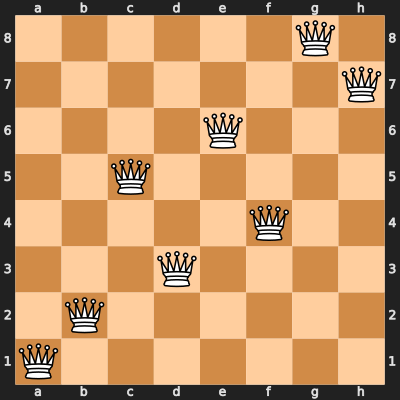

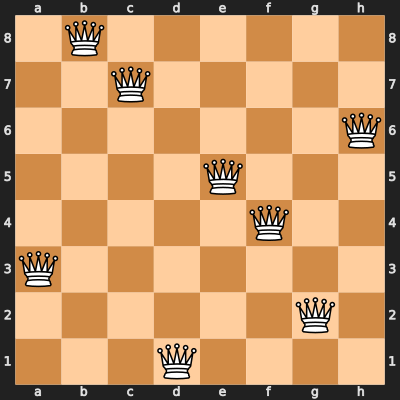

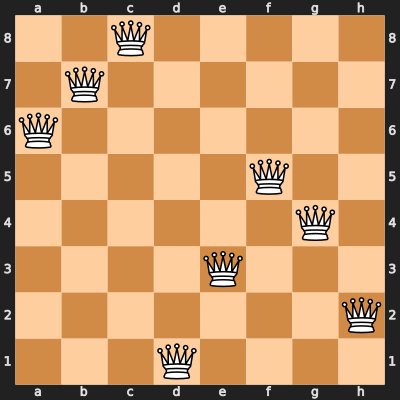

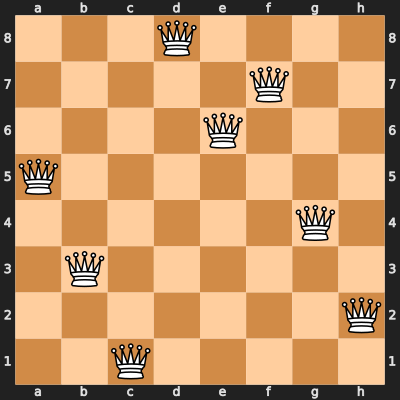

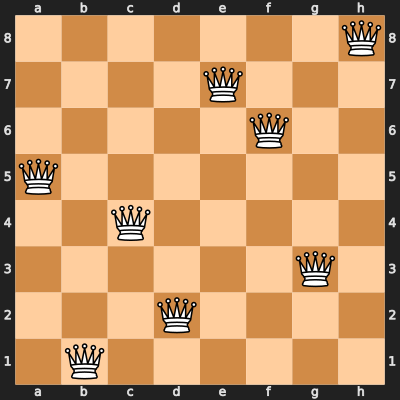

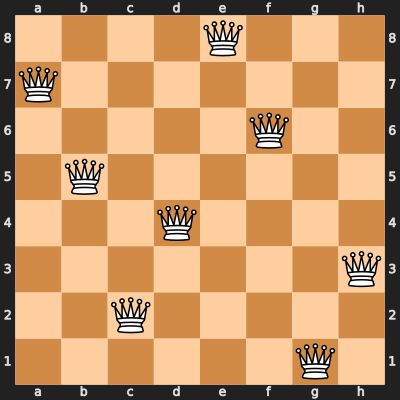

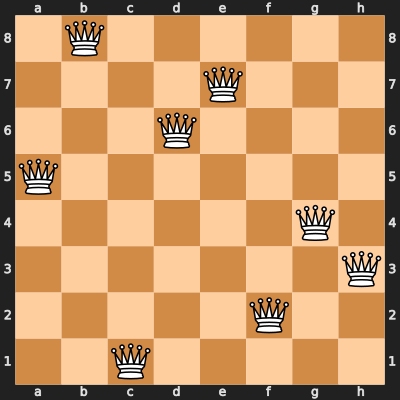

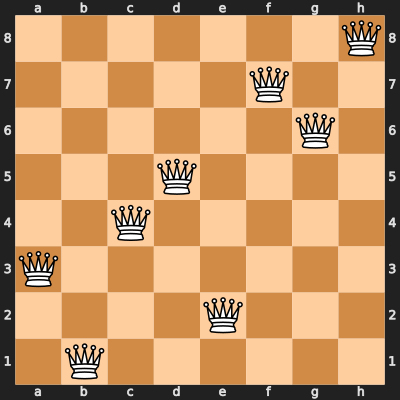

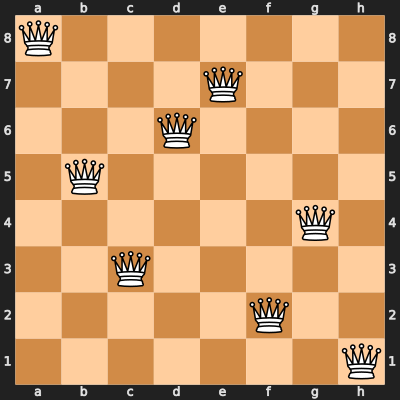

In [15]:
draw_solution(history)

Igranje sa parametrima

In [16]:
solution, history = ILS_8_queens(board, 10, 1000)

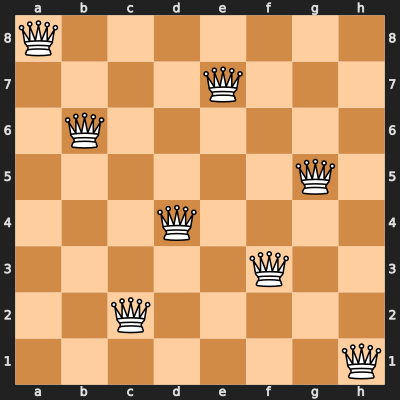

In [17]:
draw_solution(solution)

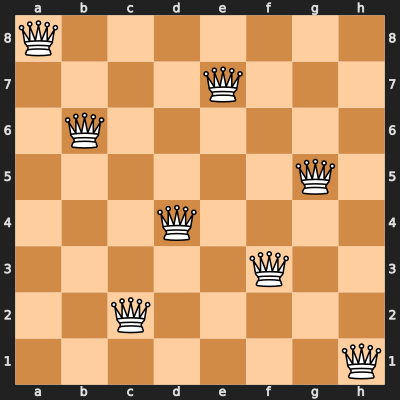

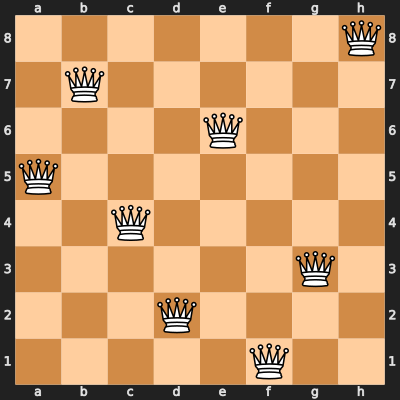

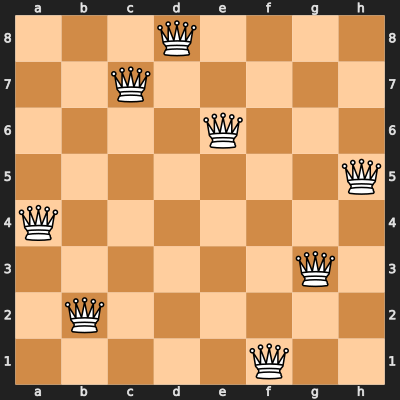

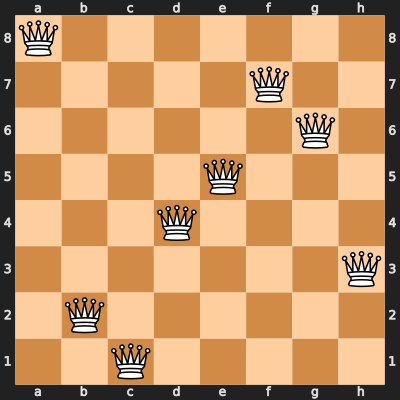

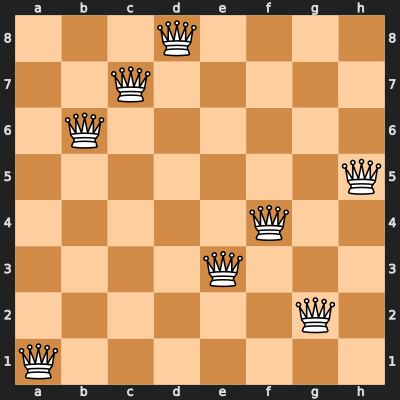

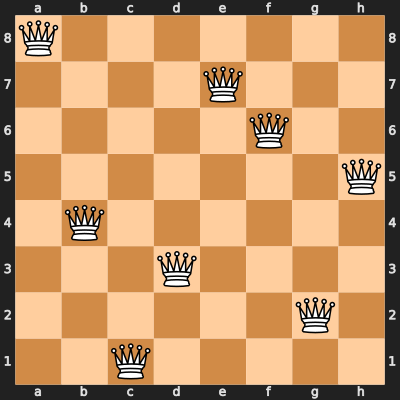

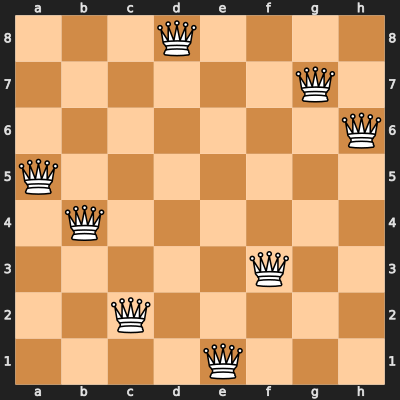

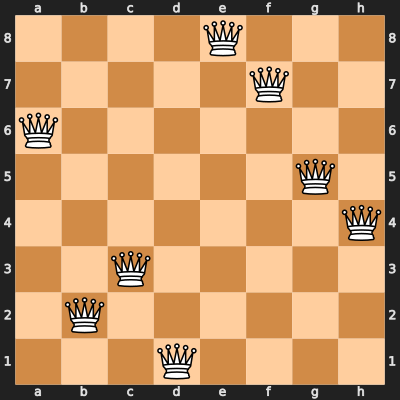

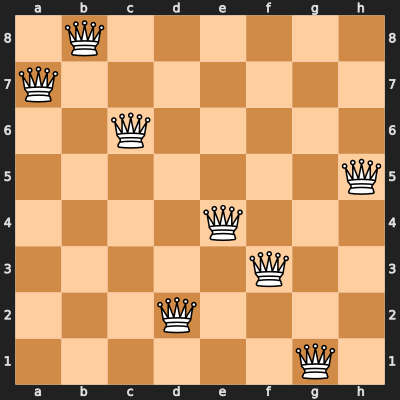

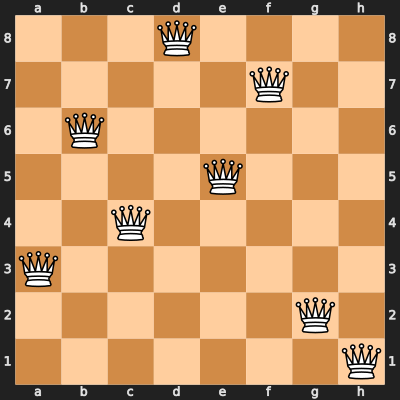

In [18]:
draw_solution(history)

num_restarts - predstavalja broj pokretanja lokalne pretrage

num_of_iterations- predstavalja broj iteracija jedne lokalne pretrage

Pokretala sam za različite vrijednosti gore navedena 2 parametra i došla do sljedečeg zaključka:
- ako prvi parametar povećavam (npr 20, 30, 100, 1000, 10000, 10000), a drugi fiksiram na 10 algoritam sporo napreduje i završi sa dosta kraljica koje se napadaju
- ako prvi parametar fiksiram na 10, a drugi povećavam (npr 1000) on iz iteracije u iteraciju napreduje i dobijem bolje rješenje nego u prvom slučaju

Takodjer, na optimalno rjesenje dosta utjece slucajni odabir pozicija za kraljice